In [1]:
import os

import numpy as np
import random as rnd
import matplotlib.pyplot as plt

%matplotlib inline

### Lab 3: Monte Carlo Method

##### Bondar Petro (Variant 2)

**Function:**  
 
$
\left\{
\begin{alignedat}{4}
     &0 \leq y \leq 1,\quad &\text{if }\quad &0 \leq x < 1\\
     &2 \leq y \leq 3,\quad &\text{if }\quad &1.5 < x < 2.5\\
     &0 \leq y \leq 3,\quad &\text{if }\quad &1 \leq x \leq 1.5 \text{ or } 2.5 \leq x \leq 4
\end{alignedat}
\right. 
$

**Exact area value:** 8 (= 12 - 2 - 2)

![Variant](Images\\Variant2-Graphic.png)

#### Generating random points

In [2]:
def generate_points(x_low, x_high, y_low, y_high, amount):
    return [(rnd.uniform(x_low, x_high), rnd.uniform(y_low, y_high)) for i in range(0, amount)]

#### Count number of points inside the figure and add them to list

In [3]:
# Function to decide whether point inside or outside figure (Variant 2)
def in_figure(point):
    x, y = point
    return not ((x < 1 and y > 1) or (x > 1.5 and x < 2.5 and y < 2))

In [4]:
# Fuction that returns count of points in figure and list of this points
def calculate_inside(set_of_points):
    counter = 0
    inside = []
    outside = []

    for point in set_of_points:
        if in_figure(point):
            counter = counter + 1
            inside.append(point)
        else:
            outside.append(point)

    return counter, inside, outside

#### Functions to calculate area and print approximation

In [5]:
def calculate_area(x_low, x_high, y_low, y_high, inside, sample_size):
    return (inside / sample_size) * (x_high - x_low) * (y_high - y_low)

In [6]:
def print_scatter_plot(inside, outside):
    point_size = 5
    x, y = zip(*inside)
    plt.scatter(x, y, c = 'red', s = point_size)

    x, y = zip(*outside)
    plt.scatter(x, y, c = 'black', s = point_size)

    plt.show()

#### Calculate area of figure

Approximate area of figure is 8.0052


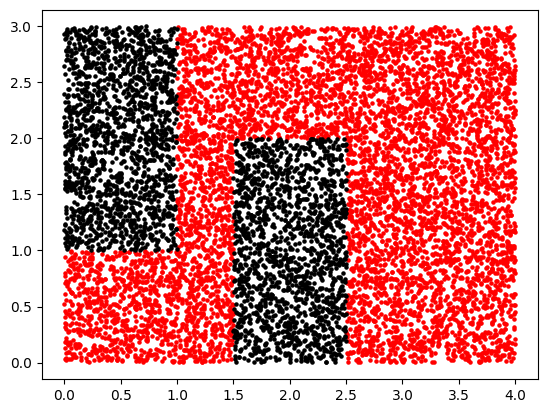

In [10]:
sample_size = 10000
low_x, high_x = 0, 4
low_y, high_y = 0, 3

sample = generate_points(low_x, high_x, low_y, high_y, sample_size)
count, inside, outside = calculate_inside(sample)

print('Approximate area of figure is', calculate_area(low_x, high_x, low_y, high_y, count, sample_size))
print_scatter_plot(inside, outside)